## Track&Field:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [8]:
data = pd.read_csv('results.csv',error_bad_lines=False)

b'Skipping line 156: expected 8 fields, saw 9\nSkipping line 157: expected 8 fields, saw 9\nSkipping line 158: expected 8 fields, saw 9\nSkipping line 317: expected 8 fields, saw 9\nSkipping line 318: expected 8 fields, saw 9\nSkipping line 319: expected 8 fields, saw 9\nSkipping line 1658: expected 8 fields, saw 9\nSkipping line 1659: expected 8 fields, saw 9\nSkipping line 1660: expected 8 fields, saw 9\nSkipping line 1784: expected 8 fields, saw 9\nSkipping line 1785: expected 8 fields, saw 9\nSkipping line 1786: expected 8 fields, saw 9\n'


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       2382 non-null   object
 1   Event        2382 non-null   object
 2   Location     2382 non-null   object
 3   Year         2382 non-null   int64 
 4   Medal        2382 non-null   object
 5   Name         2152 non-null   object
 6   Nationality  2382 non-null   object
 7   Result       2382 non-null   object
dtypes: int64(1), object(7)
memory usage: 149.0+ KB


In [12]:
data.drop(columns='Name', inplace=True)

In [15]:
data['Gender'].value_counts()

M    1626
W     756
Name: Gender, dtype: int64

In [16]:
data['Medal'].value_counts()

B    795
G    795
S    792
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Medal', ylabel='count'>

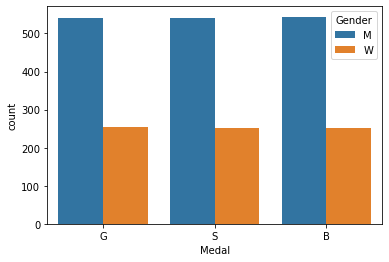

In [21]:
sns.countplot(hue=data['Gender'], x=data['Medal'], dodge=True)

In [45]:
pivote = data.pivot_table(index='Year', columns='Gender',values='Medal' ,aggfunc='size')

In [46]:
pivote

Gender,M,W
Year,,
1896,37.0,NaN
1900,45.0,NaN
1904,51.0,NaN
1908,52.0,NaN
1912,63.0,NaN
1920,42.0,NaN
1924,66.0,NaN
1928,45.0,12.0
1932,69.0,15.0


In [49]:
(data['Year'] == 2016).value_counts()

False    2241
True      141
Name: Year, dtype: int64

In [53]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Year'>

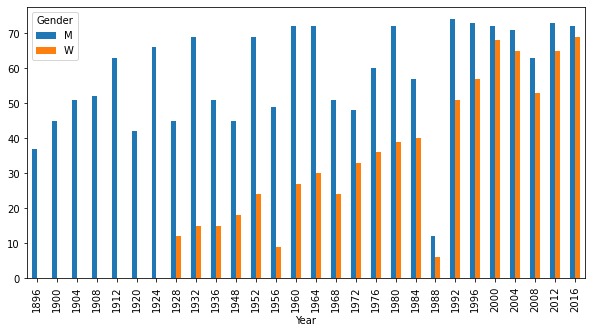

In [62]:
pivote.plot(kind='bar', figsize=(10,5))

In [64]:
data['Nationality'].unique()

array(['USA', 'KEN', 'ETH', 'MAR', 'ITA', 'GBR', 'FIN', 'POR', 'TUN',
       'URS', 'EUA', 'AUS', 'TCH', 'FRA', 'SWE', 'ERI', 'BEL', 'HUN',
       'POL', 'JAM', 'CAN', 'TTO', 'BAR', 'NAM', 'NED', 'GER', 'RSA',
       'CUB', 'BUL', 'PAN', 'NZL', 'ESP', 'CHN', 'GDR', 'ALG', 'QAT',
       'FRG', 'LUX', 'IRL', 'SUI', 'GRE', 'IND', 'RUS', 'ECU', 'MEX',
       'GUA', 'TAN', 'NOR', 'TUR', 'KSA', 'PHI', 'DOM', 'PUR', 'ZAM',
       'UGA', 'SRI', 'GRN', 'CIV', 'DEN', 'JPN', 'BRA', 'NGR', 'BAH',
       'BWI', 'BDI', 'SVK', 'LAT', 'EUN', 'SUD', 'BOT', 'BLR', 'EST',
       'CZE', 'TPE', 'KAZ', 'LTU', 'IRI', 'TJK', 'SLO', 'UKR', 'ROU',
       'HAI', 'KOR', 'ARG', 'CHI', 'DJI', 'YUG', 'VEN', 'BRN', 'AUT',
       'COL', 'MOZ', 'CRO', 'SYR', 'SRB', 'ISL', 'CMR'], dtype=object)

In [69]:
p = data.pivot_table(columns='Medal', index='Nationality', aggfunc='size')

In [80]:
p.sort_values(by=['G', 'S', 'B'],  ascending=False)

Medal,B,G,S
Nationality,,,
USA,156.0,274.0,203.0
GBR,56.0,46.0,58.0
URS,48.0,44.0,39.0
FIN,21.0,31.0,22.0
GDR,23.0,29.0,24.0
...,...,...,...
DJI,1.0,NaN,NaN
ERI,1.0,NaN,NaN
ISL,1.0,NaN,NaN


In [94]:
p.loc['IRI', :]

Medal
B    NaN
G    NaN
S    1.0
Name: IRI, dtype: float64

In [97]:
data.loc[data['Nationality'] == 'IRI', :]

,Gender,Event,Location,Year,Medal,Nationality,Result
1111,M,Discus Throw Men,London,2012,S,IRI,68.18
